In [11]:
#the code is done by the collaboration between Khaled_Waleed_Elzend & Amgad Abdallah & Samar Ghanam

In [12]:
!pip install pystan
!pip install corner

'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.


In [13]:
!pip install corner

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [41]:
#libiraries that we might need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit
import scipy.constants as const
import scipy.integrate as intg
# from scipy.integrate import quad, dblquad
from scipy.interpolate import make_interp_spline

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PoissonRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.interpolate import CubicSpline
from scipy.optimize import minimize

# importing the style package
from matplotlib import style


# creating class for the ΛCDM  model

class LCDM:
    #we put the variable that we will use frequantly
    def __init__ (self, H0, omega_M, omega_L):
        self.H0 = H0
        self.omega_M = omega_M
        self.omega_L = 1-omega_L
    #angular size distance
    def E(self,z):
        return np.sqrt(self.omega_M * (1+z)**3 + self.omega_L)
    #the reciprocal of the angular size distance
    def E_recp(self, z):
        return 1./self.E(z)
    # Hubble function
    def Hubble(self,z):
        return self.H0*self.E(z)
    #comoving distance
    def D_c(self,z):
        return self.D_H(z) * np.array([intg.quad(self.E_recp, 0, x)[0] for x in z])
    #angular distanc
    def D_A(self,z):
        return self.D_c(z) / (1+z)
    #Luminosity distance
    def D_L(self, z):
        return (1+z) * self.D_c(z)
    # the Hubble distance
    def D_H(self,z):
        return 1e-3*const.c/self.H0
    # here we defined the parsec
    def pc(self,z):
        return 10*3.0857*10**16
    #distance modulus
    def dis_Modulus(self,z):
        return 5*np.log10(self.D_L(z)) + 25
    #comoving volume
    def dv(self,z):
        return self.D_H(z)*self.D_A(z)**2 * (1+z)**2 /(self.E(z))*4*const.pi
    def fit(self, z, H0, omega_M, omega_L, M):
        p = 5*np.log10((1+z) * 1e-3*const.c/ H0 * np.array([intg.quad(lambda x: 1/np.sqrt(omega_M*(1+x)**3+omega_L), 0, x)[0] for x in z])) + M
        return p
    #comoving volume

    # def omega(self, z):
    #     f = lambda phi, theta,z: np.sin(theta)*self.D_H(z)*(1+z)**2 * self.D_A(z)**2/(self.E(z))
    #     return np.array([intg.tplquad(f, 0, const.pi, 0, 2*const.pi, 0, x)[0] for x in z])
    # def dv(self,z):
    #     def integrand(z):
    #         return self.D_H(z)*(1+z)**2 * self.D_A(z)**2/(self.E(z)) * self.domega(z)
    #     return np.array([intg.quad(integrand, 0, x, epsabs=1e-12, epsrel=1e-12)[0] for x in z])

In [15]:
# !pip install emcee

making arraies for each world model


In [16]:
#z = np.linspace(0,  2.5, 10000)
z = np.linspace(0, 2.65, 1024)

Einstein = LCDM(69.8,1,0)
low_density= LCDM(69.8,0.05, 0)
high_lambda = LCDM(69.8,0.2, 0.8)
Standard = LCDM(69.8,0.3, 0.7)

In [17]:
Standard.dis_Modulus(z)
#print (z)

C:\Users\admintest\AppData\Local\Temp\ipykernel_11008\882190301.py:59: RuntimeWarning: divide by zero encountered in log10
  return 5*np.log10(self.D_L(z)) + 25


array([       -inf, 30.78980728, 32.29844945, ..., 46.92417682,
       46.92666166, 46.92914402])

making plots for  quantity Dc

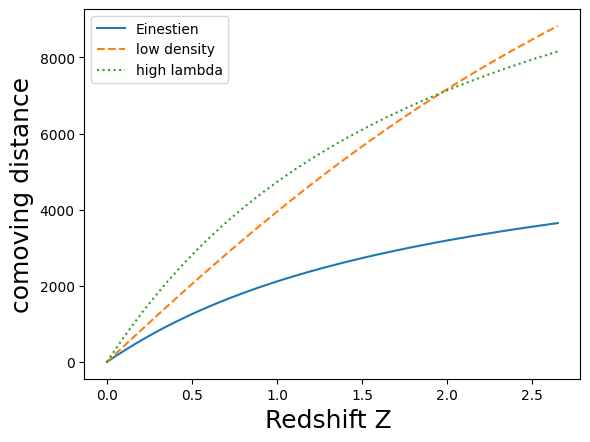

In [18]:
Comoving_dis=Einstein.D_c(z)
Comoving_dis2=low_density.D_c(z)
Comoving_dis3=high_lambda.D_c(z)

plt.xlabel('Redshift Z ',fontsize=18)
plt.ylabel('comoving distance',fontsize=18)
plt.plot(z,Comoving_dis)
plt.plot(z,Comoving_dis2,linestyle="dashed")
plt.plot(z,Comoving_dis3,linestyle=":")
plt.legend(['Einestien','low density','high lambda'])

plt.show()

making a plot for Angular diameter distance

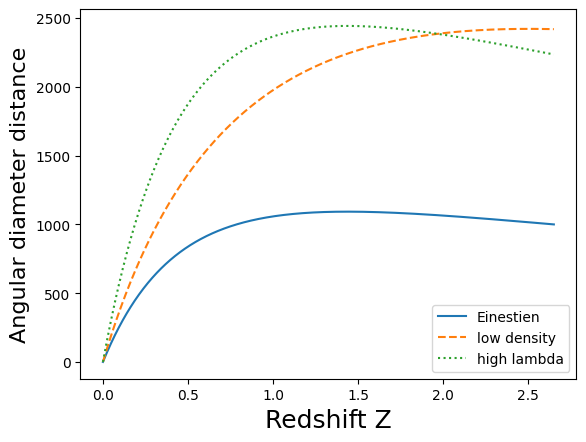

In [19]:
Angular_diameter=Einstein.D_A(z)
Angular_diameter2=low_density.D_A(z)
Angular_diameter3=high_lambda.D_A(z)
plt.xlabel("Redshift Z",fontsize=18)
plt.ylabel("Angular diameter distance",fontsize=16)
plt.plot(z,Angular_diameter)
plt.plot(z,Angular_diameter2,linestyle="dashed")
plt.plot(z,Angular_diameter3,linestyle=":")
plt.legend(['Einestien','low density','high lambda'])

plt.show()

a plot for Luminosity distance D_l

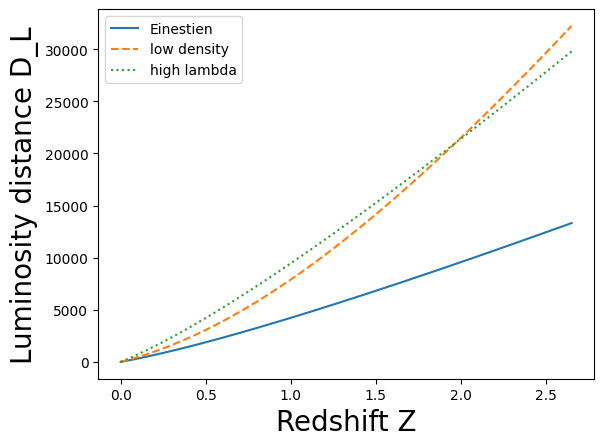

In [20]:
plt.xlabel('Redshift Z', fontsize=20)
plt.ylabel('Luminosity distance D_L',fontsize=20)
Luminosity=Einstein.D_L(z)
Luminosity2=low_density.D_L(z)
Luminosity3=high_lambda.D_L(z)
plt.plot(z,Luminosity)
plt.plot(z,Luminosity2,linestyle="dashed")
plt.plot(z,Luminosity3,linestyle=":")
plt.legend(['Einestien','low density','high lambda'])

plt.show()

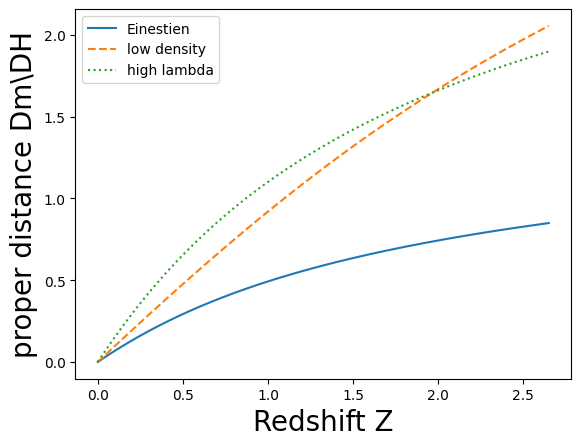

In [21]:
plt.xlabel('Redshift Z', fontsize=20)
plt.ylabel('proper distance Dm\DH',fontsize=20)
w=Einstein.D_c(z)/Einstein.D_H(z)
w_2=low_density.D_c(z)/low_density.D_H(z)
w_3=high_lambda.D_c(z)/high_lambda.D_H(z)
plt.plot(z,w)
plt.plot(z,w_2,linestyle="dashed")
plt.plot(z,w_3,linestyle=':')
plt.legend(['Einestien','low density','high lambda'])

plt.show()

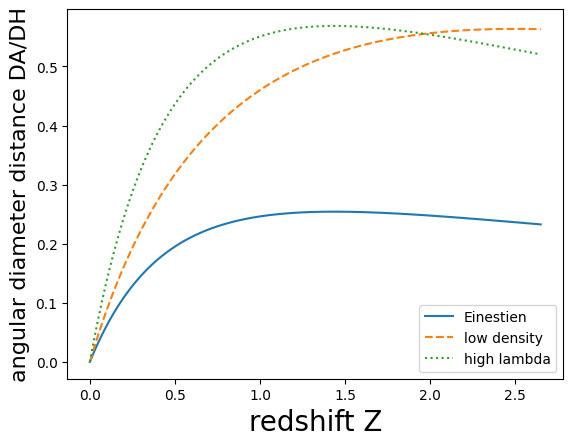

In [22]:
result_1=Einstein.D_A(z)/Einstein.D_H(z)
result_2=low_density.D_A(z)/low_density.D_H(z)
result_3=high_lambda.D_A(z)/high_lambda.D_H(z)
plt.xlabel('redshift Z',fontsize=20)
plt.ylabel('angular diameter distance DA/DH',fontsize=16)
plt.plot(z,result_1)
plt.plot(z,result_2,linestyle="dashed")
plt.plot(z,result_3,linestyle=":")
plt.legend(['Einestien','low density','high lambda'])

plt.show()

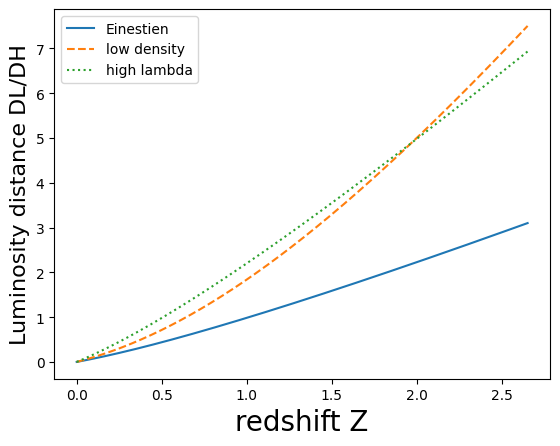

In [23]:
result_4=Einstein.D_L(z)/Einstein.D_H(z)
result_5=low_density.D_L(z)/low_density.D_H(z)
result_6=high_lambda.D_L(z)/high_lambda.D_H(z)
plt.xlabel('redshift Z',fontsize=20)
plt.ylabel('Luminosity distance DL/DH',fontsize=16)
plt.plot(z,result_4)
plt.plot(z,result_5,linestyle="dashed")
plt.plot(z,result_6,linestyle=":")
plt.legend(['Einestien','low density','high lambda'])

plt.show()



C:\Users\admintest\AppData\Local\Temp\ipykernel_11008\882190301.py:59: RuntimeWarning: divide by zero encountered in log10
  return 5*np.log10(self.D_L(z)) + 25


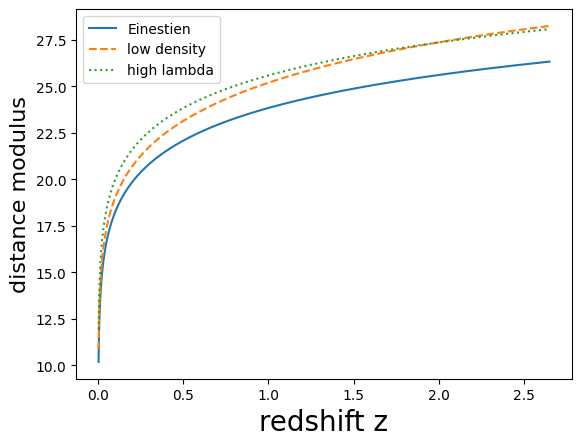

In [24]:
result_7=Einstein.dis_Modulus(z)-19.3
result_8=low_density.dis_Modulus(z)-19.3
result_9=high_lambda.dis_Modulus(z)-19.3
plt.xlabel('redshift z',fontsize=20)
plt.ylabel('distance modulus',fontsize=16)
plt.plot(z,result_7)
plt.plot(z,result_8,linestyle="dashed")
plt.plot(z,result_9,linestyle=":")
plt.legend(['Einestien','low density','high lambda'])
plt.show()



comoving volume element plot

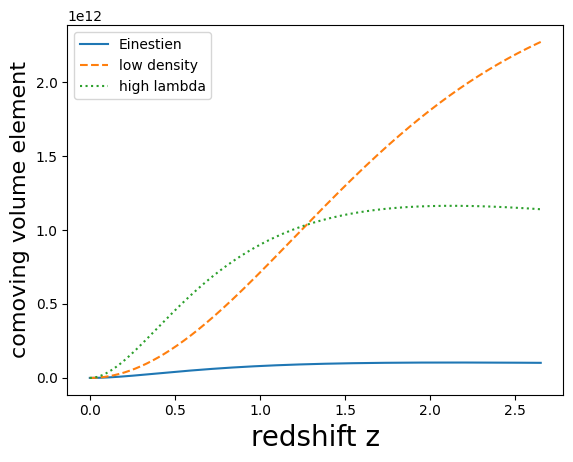

In [25]:
result_10=Einstein.dv(z)
result_11=low_density.dv(z)
result_12=high_lambda.dv(z)
plt.xlabel('redshift z',fontsize=20)
plt.ylabel('comoving volume element',fontsize=16)
plt.plot(z,result_10)
plt.plot(z,result_11,linestyle="dashed")
plt.plot(z,result_12,linestyle=":")
plt.legend(['Einestien','low density','high lambda'])
plt.show()

In [42]:
df = pd.read_csv('mB_observ1.txt', sep=" ")
df.columns =["z","m","error"]
s=np.array(df["m"].abs())
# 0.5 * (mb-mth/std(mb))**2
z_obs=df['z']
chi_array=[]
H0_arr = range(50,100)
for x in H0_arr:
    m_th=(LCDM(x, 0.7, 0.3).dis_Modulus(z_obs) - 19.3).tolist()
    chi_array.append( 0.5* np.sum(((df['m'] - m_th )/ np.std(df['m']))**2))




In [27]:
chi_array

[9.493937491664152,
 7.590606117456208,
 5.988675285212457,
 4.671672561801557,
 3.62423411844963,
 2.832013271900874,
 2.281597986749891,
 1.9604363239398959,
 1.8567689505531253,
 1.959567937574534,
 2.2584811682039314,
 2.7437817619396236,
 3.4063219910719864,
 4.2374912280849815,
 5.229177516175678,
 6.373732401845056,
 7.663938709283945,
 9.092980971914951,
 10.65441826766643,
 12.342159231951573,
 14.150439046419619,
 16.07379822277363,
 18.107063019688884,
 20.245327347435236,
 22.483936029485946,
 24.818469303419224,
 27.244728454996228,
 29.758722489602338,
 32.35665575442866,
 35.03491643297254,
 37.790065840774716,
 40.61882845787907,
 43.51808263939418,
 46.48485195082619,
 49.51629707961041,
 52.60970827855296,
 55.76249830075487,
 58.97219578907649,
 62.236439086351005,
 65.55297043540412,
 68.91963054051882,
 72.33435346432572,
 75.79516183622272,
 79.3001623503597,
 82.84754153298078,
 86.43556176051538,
 90.06255751126818,
 93.72693183488855,
 97.42715302501415,
 101.1

In [28]:
min(chi_array)


1.8567689505531253


from that index we know that the most minimum value for chi2 coressponds to an index 1 so H_0 wil be equal to 51



here we will try to get the fitting done

first method by making a 3 nested for loops


In [30]:
f = pd.read_csv('mB_observ1.txt', sep=" ")
df.columns =["z","m","error"]
s=np.array(df["m"].abs())
# 0.5 * (mb-mth/std(mb))**2
z_obs=np.array(df['z'])
chi_array=[]
index_array = []
H0_arr = []
y=[]
k_1=[]
h=60
y_0=0
k_2=1
while h < 70 :
  h+=1
  H0_arr.append(h)
while y_0<1 :
  y_0+=0.1
  y.append(y_0)
for i in range(10):
  numbers=1-i*0.1
  k_1.append(numbers)

for num in H0_arr:
    for j in y:
        for k in k_1:
          if k+j==1:
              m_th = (LCDM(num, j, k).dis_Modulus(z_obs) - 19.3).tolist()
              chi_array.append(0.5 * np.sum(((df['m'] - m_th) / np.std(df['m'])) ** 2))
              index_array.append([num, j, k])
          else:
            chi_array.append(1000000000000)
            index_array.append([num,j,k])

w=min(chi_array)

desired=chi_array.index(w)

In [31]:
desired

925

In [32]:
index_array[desired]

[69, 0.5, 0.5]

so it is clear that what fits our data is H_0=69 , omega_m=0.5 omega_l=0.5


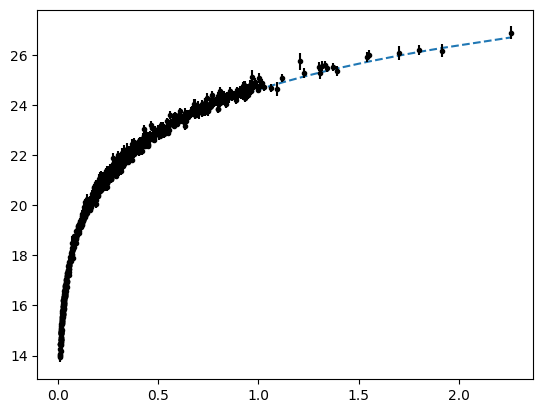

In [43]:
final_fit_line=LCDM(69,0.5,0.5)
final_result=final_fit_line.dis_Modulus(z_obs)-19.3
#c=LCDM(70, 0.35000000000000014, 0.6499999999999999).dis_Modulus(z_obs)-19.3
plt.plot(df['z'],final_result,label="fit line theortically(MCMC 96.99,0.36,0.61)",linestyle="dashed")
#plt.plot(df['z'],c,label='70,0.29,0.71')
plt.errorbar(df['z'],df['m'], yerr=df['error'],fmt=".k", capsize=0,label='practical data')
plt.show()


In [63]:
import numpy as np
import emcee
from tqdm import tqdm

def chi_squared(parameters):
    H0, omega_M, omega_L = parameters
    m_th = (LCDM(H0, omega_M, omega_L).dis_Modulus(z_obs) - 19.3).tolist()
    chi_2 = 0.5 * np.sum(((df['m'] - m_th) / np.std(df['m']))**2)
    return chi_2

def log_likelihood(parameters):
    chi2 = chi_squared(parameters)
    return -0.5 * chi2

def log_prior(parameters):
    H0, omega_M, omega_L=parameters
    if 50 <= H0 <= 100 and 0 <= omega_M <= 1 and 0 <= omega_L <= 1:
        return 0.0
    return -np.inf

def log_posterior(parameters):
    log_prior_value = log_prior(parameters)
    if not np.isfinite(log_prior_value):
        return -np.inf
    return log_prior_value + log_likelihood(parameters)

nwalkers = 100
ndim = 3
initial_params = [70, 0.3, 0.7]
pos = [initial_params + 1e-3 * np.random.randn(ndim) for _ in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior)

nsteps = 100
sampler.run_mcmc(pos, nsteps, progress=True)

with tqdm(total=nsteps) as pbar:
    for _ in sampler.sample(pos, iterations=nsteps):
        pbar.update(1)

samples = sampler.get_chain(discard=100, flat=True)

best_fit_params = np.median(samples, axis=0)

print("Best-fit parameters:")
print("H0 =", best_fit_params[0])
print("omega_M =", best_fit_params[1])
print("omega_L =", best_fit_params[2])

100%|██████████| 100/100 [03:00<00:00,  1.81s/it]

Best-fit parameters:
H0 = 69.9996139613383
omega_M = 0.3933029363970982
omega_L = 0.6474756382466826


let's know compare the results that we get from the MCMC algorthim and the 3 nested for loops 


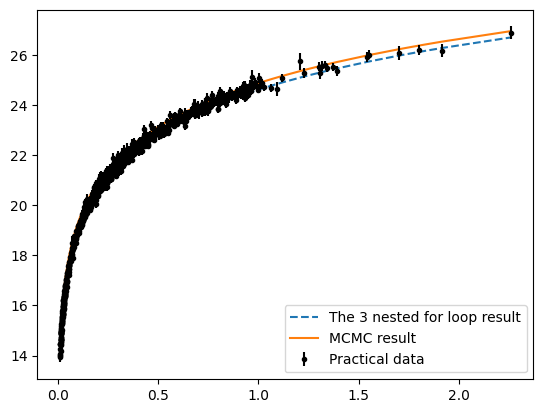

In [68]:
final_fit_line = LCDM(69, 0.5, 0.5)
final_result = final_fit_line.dis_Modulus(z_obs) - 19.3
c = LCDM(69.9996139613383, 0.3933029363970982, 0.6474756382466826).dis_Modulus(z_obs) - 19.3

plt.plot(df['z'], final_result, label="The 3 nested for loop result", linestyle="dashed")
plt.plot(df['z'], c, label='MCMC result')
plt.errorbar(df['z'], df['m'], yerr=df['error'], fmt=".k", capsize=0, label='Practical data')

plt.legend()  

plt.show()

In [69]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)

(600, 3)


C:\Users\admintest\AppData\Local\Temp\ipykernel_11008\1308095626.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  corner_plot.show()


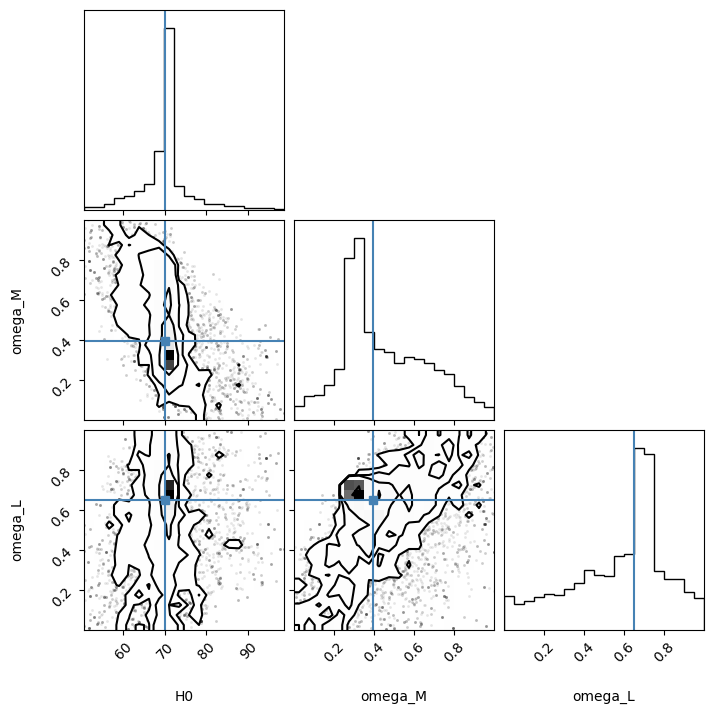

In [70]:
# Corner plot
import corner
labels = ['H0', 'omega_M', 'omega_L']
corner_plot = corner.corner(samples, labels=labels, truths=best_fit_params)

corner_plot.show()